In [123]:
#Se importan los paquetes
#import plotly.plotly as py
#import plotly.graph_objs as go
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties
from matplotlib import pylab
from scipy.optimize import curve_fit

In [124]:
#Constante G gravitacional
G = 7.748091735e-5

#Masas
m_Hyp = 1.426708
m_sat = 45807825.48
r_Hyp = 2.43079e-4

#Condiciones iniciales
x_10 = 1.0
y_10 = 0.0
θ_0 = 0.0
θ_02 = 0.01
ω_0 = 0*5.43981117e-7
v_x0 = 0.0
v_y0 = 5.0 #2*np.pi
x_20 = x_10 + 2*r_Hyp*np.cos(θ_0)
y_20 = y_10 + 2*r_Hyp*np.sin(θ_0)
x_c0 = 0.5*(x_10 + x_20)
y_c0 = 0.5*(y_10 + y_20)

In [125]:
#El SEDO de los centros de masa:
""""
        dx_c/dt = v_xc
        dv_xc/dt = (-G*m_sat*x_c/(x_c**2 + y_c**2)**(3/2)
        
        dy_c/dt = v_yc
        dv_yc/dt = (-G*m_sat*y_c/(x_c**2 + y_c**2)**(3/2)
    """
#Se define la función
def fun(r, t, c):
    x_c, v_xc, y_c, v_yc = r
    G, m_sat = c
    drdt = [v_xc, (-4*(np.pi**2)*x_c)/(x_c**2 + y_c**2)**(3/2), v_yc, (-4*(np.pi**2)*y_c)/(x_c**2 + y_c**2)**(3/2)]
    return drdt

In [126]:
CI = [x_c0, v_x0, y_c0, v_y0]
c = [G, m_sat]

#Parametros para el solucionador de EDO
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 100000

#Se crean las muestras de tiempo para el resultado del solucionador de EDO.  
#Se usa un gran número de puntos, para hacer una gráfica que se vea bien.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

#Llamando al solucionador
sol = odeint(fun, CI, t, args=(c,), atol = abserr, rtol = relerr)

In [127]:
#Se crean arreglos para las posiciones y velocidades del centro de masa
x_c = []
y_c = []
v_xc = []
v_yc = []
r_c = []

#Se llenan
x_c = sol[:, 0]
y_c = sol[:, 2]
v_xc = sol[:, 1]
v_yc = sol[:, 3]
r_c = np.sqrt(x_c**2 + y_c**2)

In [128]:
#Se hacen las listas
lista = list(zip(t, x_c, y_c, v_xc, v_yc, r_c))

#Se hace un DataFrame con los datos obtenidos
df0 = pd.DataFrame(lista, columns = ['Tiempo', 'xc', 'yc' ,'vx', 'vy', 'rc'])
df0.head()

,Tiempo,xc,yc,vx,vy,rc
0,0.0000,1.000243,0.0000,0.000000,5.000000,1.000243
1,0.0001,1.000243,0.0005,-0.003946,4.999999,1.000243
2,0.0002,1.000242,0.0010,-0.007892,4.999996,1.000243
3,0.0003,1.000241,0.0015,-0.011838,4.999991,1.000242
4,0.0004,1.000240,0.0020,-0.015784,4.999984,1.000242


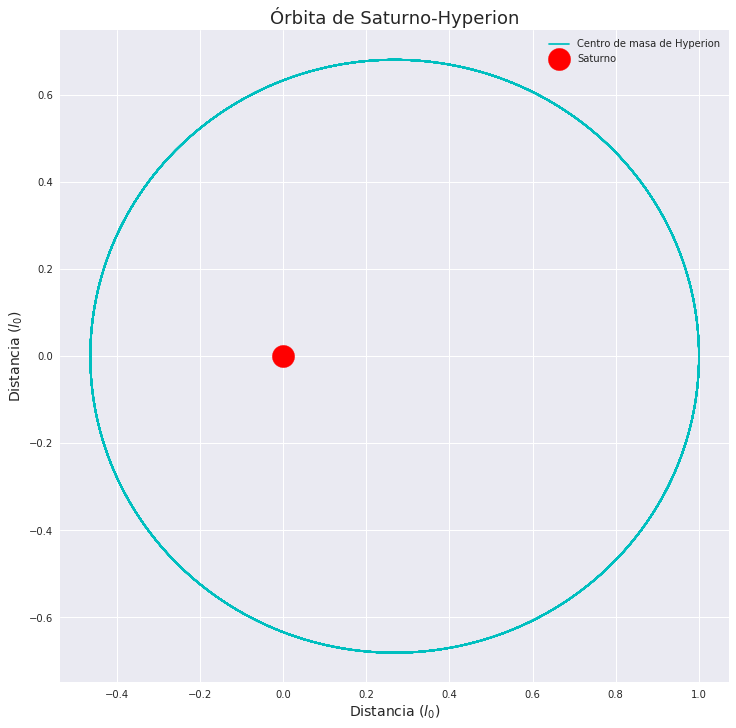

In [129]:
#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))

plt.plot(x_c, y_c, 'c', label = 'Centro de masa de Hyperion')
plt.legend()
plt.scatter(0, 0, s=500, label = 'Saturno', color = 'red')
plt.legend()
plt.xlabel(r'Distancia $(l_0)$', fontsize = 14)
plt.ylabel(r'Distancia $(l_0)$', fontsize = 14)
title('Órbita de Saturno-Hyperion', fontsize = 18)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('o2.png', dpi=300)

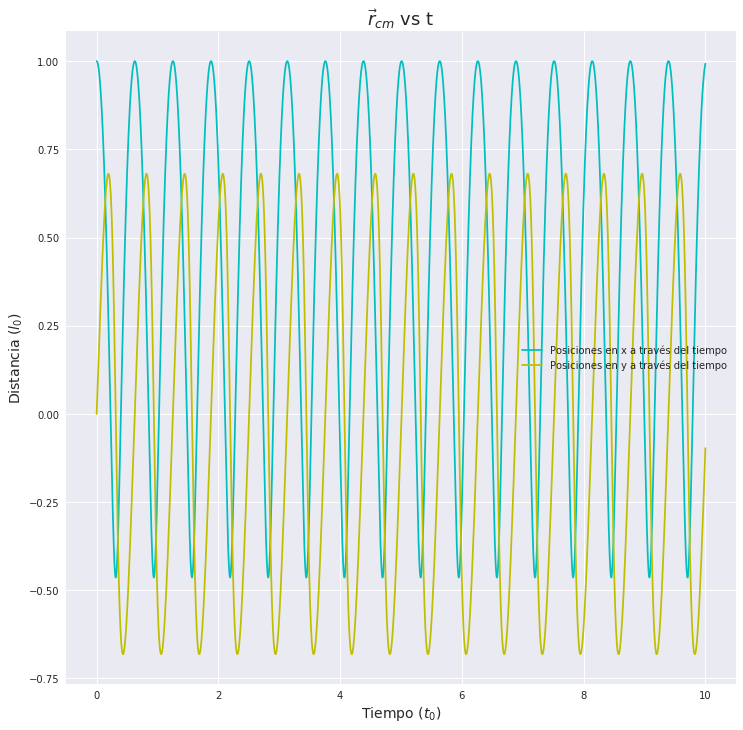

In [130]:
#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))

plt.plot(t, x_c, 'c', label = 'Posiciones en x a través del tiempo')
plt.legend()
plt.plot(t, y_c, 'y', label = 'Posiciones en y a través del tiempo')
plt.legend()
plt.xlabel(r'Tiempo $(t_0)$', fontsize = 14)
plt.ylabel(r'Distancia $(l_0)$', fontsize = 14)
title(r'$\vec{r}_{cm}$ vs t', fontsize = 18)
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('r2.png', dpi=300)

In [131]:
#El SEDO del desplazamiento angular:
""""
        dθ/dt = ω
        dω/dt = ( ( -12*(np.pi**2) )  * ( ( x_c[i]*np.sin(θ[i]) - y_c[i]*np.cos(θ[i]) ) * ( x_c[i]*np.cos(θ[i]) + y_c[i]*np.sin(θ[i]) ) ) )/(r_cm[i]**5)
    """
#Se define la función
def f(θ, x_c, y_c, r_c):
    dxdt = [( ( -12*(np.pi**2) )  * ( ( x_c*np.sin(θ) - y_c*np.cos(θ) ) * ( x_c*np.cos(θ) + y_c*np.sin(θ) ) ) )/(r_c**5)]
    return dxdt

In [132]:
#Se define el ancho de paso 
h = stoptime/numpoints

In [133]:
#Se declaran los arreglos de theta, omega
theta = []
omega = []
alfa = []

theta2 = []
omega2 = []
alfa2 = []

In [134]:
for i in range(0, len(t)):
    theta.append(θ_0)
    omega.append(ω_0)
    alfa.append(θ_0)

In [135]:
#Se utiliza Runge Kutta de orden cuatro
for i in range(1, len(t)):
    k1 = h*omega[i-1]
    l0 = f(theta[i-1], x_c[i-1], y_c[i-1], r_c[i-1])
    l1 = h*l0[0]
    k2 = h*(omega[i-1] + 0.5*l1)
    l0 = f(theta[i-1] + 0.5*k1, x_c[i-1], y_c[i-1], r_c[i-1])
    l2 = h*l0[0]
    k3 = h*(omega[i-1] + 0.5*l2)
    l0 = f(theta[i-1] + 0.5*k2, x_c[i-1], y_c[i-1], r_c[i-1])
    l3 = h*l0[0]
    k4 = h*(omega[i-1] + l3)
    l0 = f(theta[i-1] + k3, x_c[i-1], y_c[i-1], r_c[i-1])
    l4 = h*l0[0]
    
    omega[i] = omega[i-1] + (l1 + 2*l2 + 2*l3 + l4)/6
    temporal = theta[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    if (temporal<-np.pi):
        temporal = temporal + 2*np.pi
    elif (temporal>np.pi):
        temporal = temporal - 2*np.pi
    theta[i] = temporal

In [136]:
#Se utiliza Runge Kutta de orden cuatro
for i in range(1, len(t)):
    k1 = h*omega[i-1]
    l0 = f(alfa[i-1], x_c[i-1], y_c[i-1], r_c[i-1])
    l1 = h*l0[0]
    k2 = h*(omega[i-1] + 0.5*l1)
    l0 = f(alfa[i-1] + 0.5*k1, x_c[i-1], y_c[i-1], r_c[i-1])
    l2 = h*l0[0]
    k3 = h*(omega[i-1] + 0.5*l2)
    l0 = f(alfa[i-1] + 0.5*k2, x_c[i-1], y_c[i-1], r_c[i-1])
    l3 = h*l0[0]
    k4 = h*(omega[i-1] + l3)
    l0 = f(alfa[i-1] + k3, x_c[i-1], y_c[i-1], r_c[i-1])
    l4 = h*l0[0]
    
    alfa[i] = alfa[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6

In [137]:
#Se declaran los arreglos para la variación de theta
for i in range(0, len(t)):
    theta2.append(θ_02)
    omega2.append(ω_0)
    alfa2.append(θ_02)

In [138]:
#Se utiliza Runge Kutta de orden cuatro
for i in range(1, len(t)):
    k1 = h*omega2[i-1]
    l0 = f(theta2[i-1], x_c[i-1], y_c[i-1], r_c[i-1])
    l1 = h*l0[0]
    k2 = h*(omega2[i-1] + 0.5*l1)
    l0 = f(theta2[i-1] + 0.5*k1, x_c[i-1], y_c[i-1], r_c[i-1])
    l2 = h*l0[0]
    k3 = h*(omega2[i-1] + 0.5*l2)
    l0 = f(theta2[i-1] + 0.5*k2, x_c[i-1], y_c[i-1], r_c[i-1])
    l3 = h*l0[0]
    k4 = h*(omega2[i-1] + l3)
    l0 = f(theta2[i-1] + k3, x_c[i-1], y_c[i-1], r_c[i-1])
    l4 = h*l0[0]
    
    omega2[i] = omega2[i-1] + (l1 + 2*l2 + 2*l3 + l4)/6
    temporal = theta2[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    if (temporal<-np.pi):
        temporal = temporal + 2*np.pi
    elif (temporal>np.pi):
        temporal = temporal - 2*np.pi
    theta2[i] = temporal

In [139]:
#Se utiliza Runge Kutta de orden cuatro
for i in range(1, len(t)):
    k1 = h*omega2[i-1]
    l0 = f(alfa2[i-1], x_c[i-1], y_c[i-1], r_c[i-1])
    l1 = h*l0[0]
    k2 = h*(omega2[i-1] + 0.5*l1)
    l0 = f(alfa2[i-1] + 0.5*k1, x_c[i-1], y_c[i-1], r_c[i-1])
    l2 = h*l0[0]
    k3 = h*(omega2[i-1] + 0.5*l2)
    l0 = f(alfa2[i-1] + 0.5*k2, x_c[i-1], y_c[i-1], r_c[i-1])
    l3 = h*l0[0]
    k4 = h*(omega2[i-1] + l3)
    l0 = f(alfa2[i-1] + k3, x_c[i-1], y_c[i-1], r_c[i-1])
    l4 = h*l0[0]
    
    alfa2[i] = alfa2[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6

In [140]:
#Se consiguen las posiciones de las masas
x_2 = []
y_2 = []
x_1 = []
y_1 = []

x_2 = x_c + r_Hyp*np.cos(theta)
y_2 = y_c + r_Hyp*np.sin(theta)
x_1 = x_c - r_Hyp*np.cos(theta)
y_1 = y_c - r_Hyp*np.sin(theta)

In [141]:
#Agregando los datos al DataFrame
df0['θ'] = pd.DataFrame(theta)
df0['ω'] = pd.DataFrame(omega)
df0['x2'] = pd.DataFrame(x_2)
df0['y2'] = pd.DataFrame(y_2)
df0['x1'] = pd.DataFrame(x_1)
df0['y1'] = pd.DataFrame(y_1)
df0.head()

,Tiempo,xc,yc,vx,vy,rc,θ,ω,x2,y2,x1,y1
0,0.0000,1.000243,0.0000,0.000000,5.000000,1.000243,0.000000e+00,0.000000,1.000486,0.0000,1.000000,0.0000
1,0.0001,1.000243,0.0005,-0.003946,4.999999,1.000243,0.000000e+00,0.000000,1.000486,0.0005,1.000000,0.0005
2,0.0002,1.000242,0.0010,-0.007892,4.999996,1.000243,2.958032e-10,0.000006,1.000485,0.0010,0.999999,0.0010
3,0.0003,1.000241,0.0015,-0.011838,4.999991,1.000242,1.479016e-09,0.000018,1.000484,0.0015,0.999998,0.0015
4,0.0004,1.000240,0.0020,-0.015784,4.999984,1.000242,4.141243e-09,0.000035,1.000483,0.0020,0.999997,0.0020


In [142]:
#Se consiguen las posiciones de las masas en el origen
x2 = []
y2 = []
x1 = []
y1 = []

for i in range(0, int(0.8*len(t)) ):
    x = 0.001*x_c[i] + r_Hyp*np.cos(theta[i])
    y = 0.001*y_c[i] + r_Hyp*np.sin(theta[i])
    xx = 0.001*x_c[i] - r_Hyp*np.cos(theta[i])
    yy = 0.001*y_c[i] - r_Hyp*np.sin(theta[i])
    x2.append(x)
    y2.append(y)
    x1.append(xx)
    y1.append(yy)

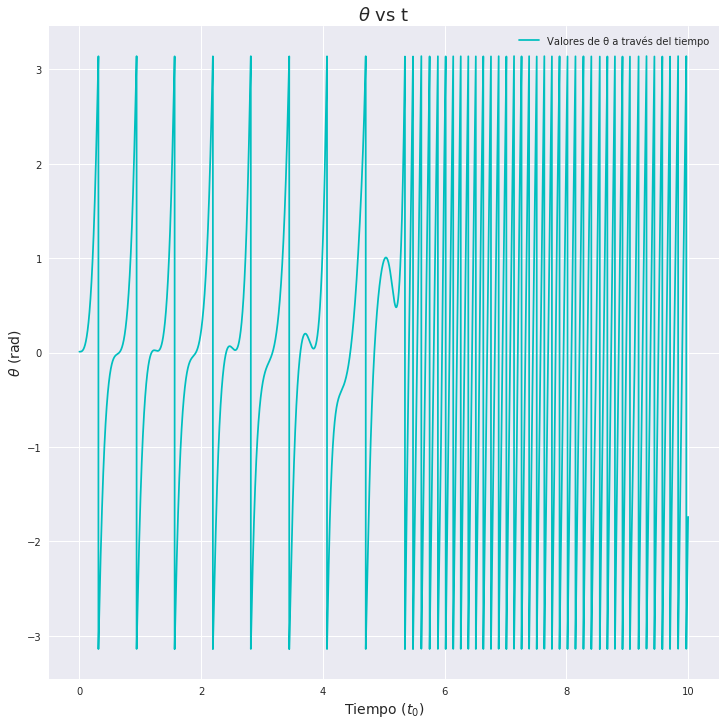

In [143]:
#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))

plt.plot(t, theta2, 'c', label = 'Valores de θ a través del tiempo')
plt.legend()
plt.xlabel(r'Tiempo $(t_0)$', fontsize = 14)
plt.ylabel(r'$\theta$ (rad)', fontsize = 14)
title(r'$\theta$ vs t', fontsize = 18)
fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig('t2.png', dpi=300)

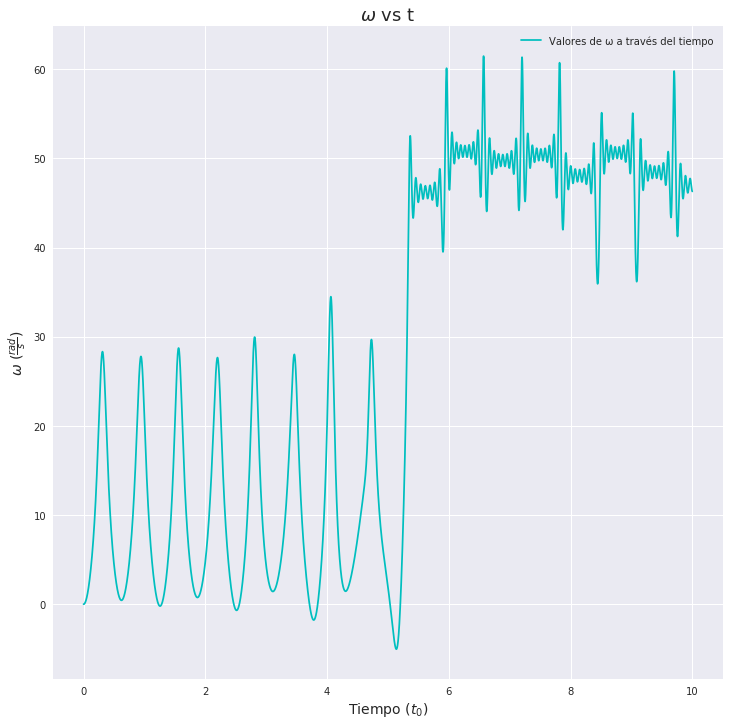

In [144]:
#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))

plt.plot(t, omega2, 'c', label = 'Valores de ω a través del tiempo')
plt.legend()
plt.xlabel(r'Tiempo $(t_0)$', fontsize = 14)
plt.ylabel(r'$\omega$ $(\frac{rad}{s})$', fontsize = 14)
title(r'$\omega$ vs t', fontsize = 18)
fig4 = plt.gcf()
plt.show()
plt.draw()
fig4.savefig('w2.png', dpi=300)

In [145]:
#Energía cinética lineal
Tl = []
Tl = 0.5*m_Hyp*(v_xc**2 + v_yc**2)

#Obteniendo las energías de Hyperion:
#Energía cinética rotacional
Tr = []
for i in range (0, len(t)):
    Tr = 0.5*m_Hyp*(r_Hyp**2)*(omega[i]**2)

#Energía cinética total
T = Tl + Tr

#Energía potencial
V = []
V = (-4*(np.pi**2)*m_Hyp)/r_c

#Energía mecánica total
E= []
E = T + V

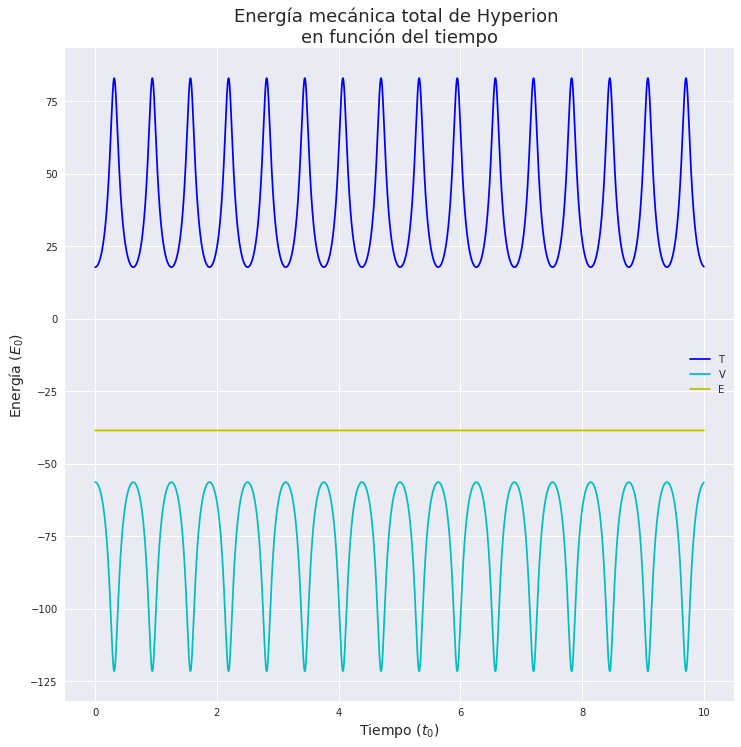

In [146]:
#Graficando las energías en función del tiempo
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))

plt.plot(t, T, 'b', label = 'T')
plt.plot(t, V, 'c', label = 'V')
plt.plot(t, E, 'y', label = 'E')
plt.legend()
plt.xlabel(r'Tiempo $(t_0)$', fontsize = 14)
plt.ylabel(r'Energía ($E_0$)', fontsize = 14)
title('Energía mecánica total de Hyperion \nen función del tiempo', fontsize = 18)
fig5 = plt.gcf()
plt.show()
plt.draw()
fig5.savefig('e2.png', dpi=300)

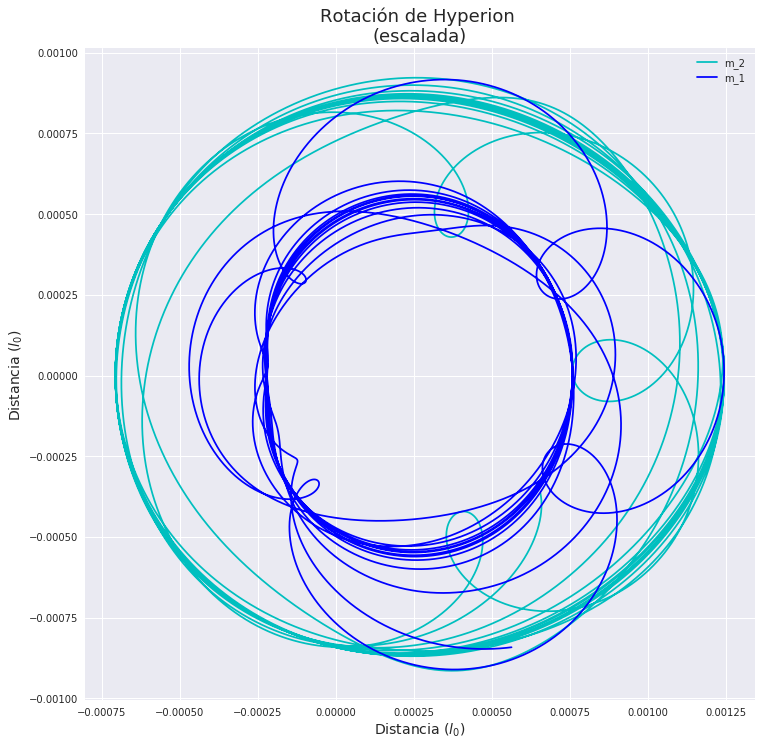

In [147]:
#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))

plt.plot(x2, y2, 'c', label = r'm_2')
plt.legend()
plt.plot(x1, y1, 'b', label = r'm_1')
plt.legend()
plt.xlabel(r'Distancia $(l_0)$', fontsize = 14)
plt.ylabel(r'Distancia $(l_0)$', fontsize = 14)
title('Rotación de Hyperion \n(escalada)', fontsize = 18)
fig6 = plt.gcf()
plt.show()
plt.draw()
fig6.savefig('om2.png', dpi=300)

In [148]:
#Se calcula la diferencia de theta
difth = []
difth2 = []
difth3 = []
difth4 = []
for i in range (0, len(t)):
    f = np.sqrt((alfa[i] - alfa2[i])**2)
    if (f<-np.pi):
        f = f + 2*np.pi
    elif (f>np.pi):
        f = f - 2*np.pi
    difth.append(f)
    
for i in range(0, len(t)):
    p = np.sqrt((theta[i] - theta2[i])**2)
    if (p<-np.pi):
        p = p + 2*np.pi
    elif (p>np.pi):
        p = p - 2*np.pi
    difth2.append(p)
    
for i in range(0, len(t)):
    r = np.sqrt((theta[i] - theta2[i])**2)
    difth3.append(r)
    
for i in range(0,len(t)):
    u = np.sqrt((alfa[i]-alfa2[i])**2)
    difth4.append(u)

In [149]:
#Se hacen otra listas
lista2 = list(zip(t, theta, theta2, alfa, alfa2, difth))

#Se hace un DataFrame con los datos obtenidos
df1 = pd.DataFrame(lista2, columns = ['Tiempo', r'$\theta_1$', r'$\theta_2$', r'$\alpha_1$', r'$\alpha_2$',r'$\Delta \theta$'])
df1

,Tiempo,$\theta_1$,$\theta_2$,$\alpha_1$,$\alpha_2$,$\Delta \theta$
0,0.0000,0.000000e+00,0.010000,0.000000e+00,0.010000,0.010000
1,0.0001,0.000000e+00,0.010000,0.000000e+00,0.010000,0.010000
2,0.0002,2.958032e-10,0.010000,2.958032e-10,0.010000,0.010000
3,0.0003,1.479016e-09,0.010000,1.479016e-09,0.010000,0.010000
4,0.0004,4.141243e-09,0.010000,4.141243e-09,0.010000,0.010000
5,0.0005,8.874088e-09,0.010000,8.874088e-09,0.010000,0.010000
6,0.0006,1.626916e-08,0.010000,1.626916e-08,0.010000,0.010000
7,0.0007,2.691805e-08,0.010000,2.691805e-08,0.010000,0.010000
8,0.0008,4.141236e-08,0.010000,4.141236e-08,0.010000,0.010000
9,0.0009,6.034369e-08,0.010000,6.034369e-08,0.010000,0.010000


In [150]:
#Se hacen otra listas
lista3 = list(zip(t, difth2))

#Se hace un DataFrame con los datos obtenidos
df2 = pd.DataFrame(lista3, columns = ['Tiempo', r'$\Delta \theta$'])
df2.to_csv(r'or.txt', header=None, index=None, sep=' ', mode='a')

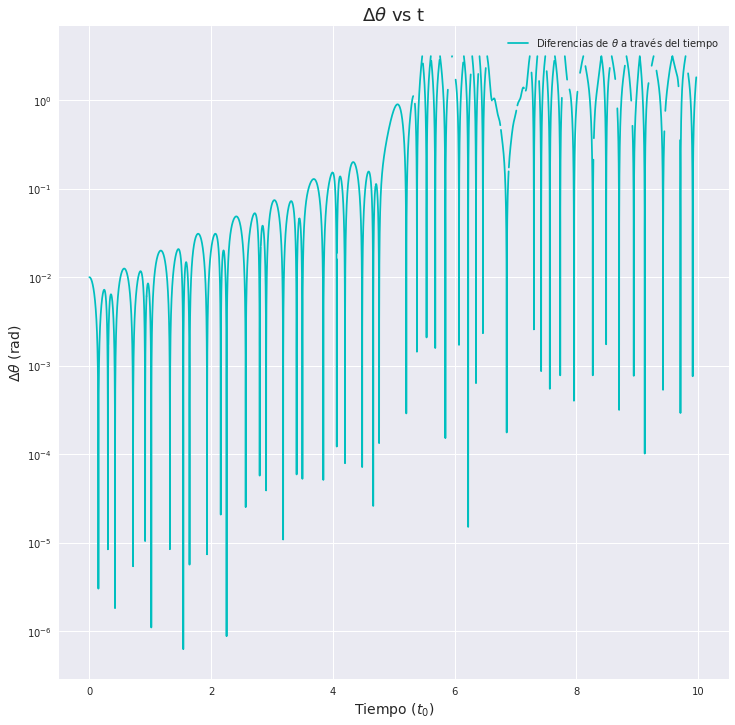

In [151]:
#Graficando la diferencia de thetas respecto al tiempo

#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))

plt.plot(t, difth2, 'c', label = r'Diferencias de $\theta$ a través del tiempo')
plt.legend()
plt.xlabel(r'Tiempo $(t_0)$', fontsize = 14)
plt.ylabel(r'$\Delta \theta$ (rad)', fontsize = 14)
plt.yscale('log')
title(r'$\Delta \theta$ vs t', fontsize = 18)
plt.show()
plt.savefig("difthvst.jpg", dpi = 100)

In [152]:
#Se calcula la recta
reg = []
for i in range(0, len(t)):
    q = 0.0910314*np.exp(0.237489*t[i])
    reg.append(q)

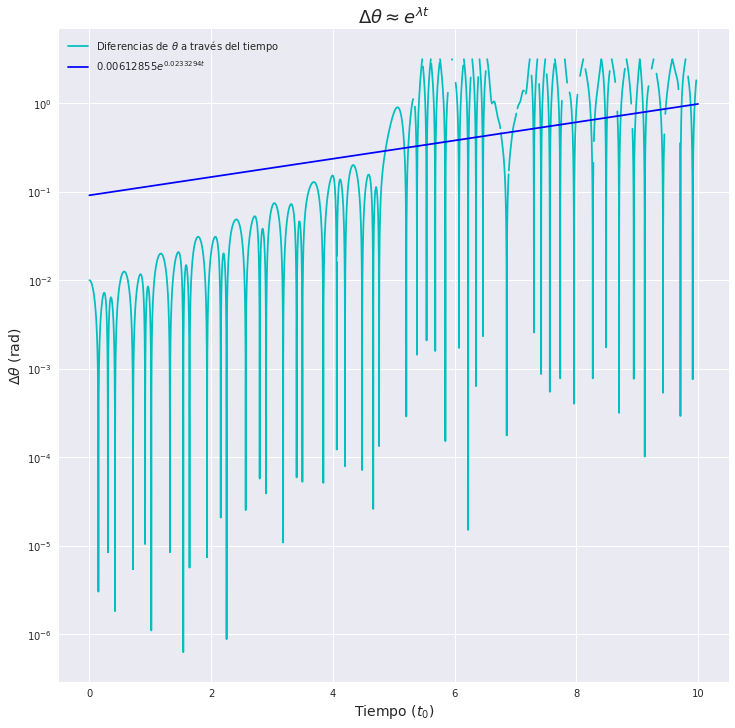

In [153]:
#Se hace una regresión exponencial

#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))

plt.plot(t, difth2, 'c', label = r'Diferencias de $\theta$ a través del tiempo')
plt.plot(t, reg, 'b', label = r'$0.00612855e^{0.0233294t}$')
plt.legend()
plt.xlabel(r'Tiempo $(t_0)$', fontsize = 14)
plt.ylabel(r'$\Delta \theta$ (rad)', fontsize = 14)
plt.yscale('log')
title(r'$\Delta \theta \approx e^{\lambda t}$', fontsize = 18)
fig7 = plt.gcf()
plt.show()
plt.draw()
fig7.savefig('reg2.png', dpi=300)

In [154]:
#Calculamos la regresión
#difthp = np.log(difth3)
#pp = np.polyfit(t, difthp, 1)
#ap = pp[0]
#bp = pp[1]

In [155]:
#Se hacen otra listas
#lista2 = list(zip(t, x2, y2, x1, y1))

#Se hace un DataFrame con los datos obtenidos
#df1 = pd.DataFrame(lista2, columns = ['Tiempo', 'x2', 'y2' ,'x1', 'y1'])
#df1

In [156]:
#Comando para darle una estética distinta a las gráficas.
#sns.set(rc={'figure.figsize':(12,12)})
#figure(1, figsize=(12, 12))

#plt.plot(alfa, omega, 'c', label = 'Valores de ω a través del tiempo')
#plt.legend()
#plt.xlabel(r'θ $(rad)$', fontsize = 14)
#plt.ylabel(r'$\omega$ $(\frac{rad}{s})$', fontsize = 14)
#title(r'$\omega$ vs $\theta$', fontsize = 18)
#plt.show()
#savefig("ωvsθ.jpg", dpi = 100)